# 그냥 이것저것 실험해보려고 만듦. code.ipynb가 중요

In [15]:
from pennylane import numpy as np
import matplotlib.pyplot as plt

def generate_points_distribution(data_num=2000, dist_type="circle"):
    if dist_type == 'spiral':
        theta = np.linspace(0, 5*np.pi, data_num)  # 각도 범위를 정의합니다.
        radius = np.linspace(0, 0.35, data_num)  # 반지름 범위를 정의합니다.
        xx = 0.5 + radius * np.cos(theta) + 0.012 * np.random.randn(data_num)  # x 좌표 계산
        yy = 0.4 + radius * np.sin(theta) + 0.012 * np.random.randn(data_num)  # y 좌표 계산
    
    elif dist_type == 'box':
        xx = np.random.uniform(0.4, 0.8, data_num) + 0.012 * np.random.randn(data_num)  # x 좌표 계산
        yy = np.random.uniform(0.2, 0.7, data_num) + 0.012 * np.random.randn(data_num)  # y 좌표 계산

    elif dist_type == 'curve':
        xx = np.linspace(0.15, 0.85, data_num) + 0.02 * np.random.randn(data_num)  # x 좌표 계산
        yy = 3.8 * xx*xx - 3.8 * xx + 1.2 + 0.03 * np.random.randn(data_num)  # y 좌표 계산
    
    elif dist_type == 'circle':
        radius = 0.20
        theta = np.linspace(0, 2 * np.pi, data_num)  # 각도 범위를 정의합니다.
        xx = radius * np.cos(theta) + 0.5 + 0.02 * np.random.randn(data_num)  # x 좌표 계산
        yy = radius * np.sin(theta) + 0.55 + 0.02 * np.random.randn(data_num)  # y 좌표 계산

    elif dist_type == 'lemniscate':
        xx = []
        yy = []
        while len(xx) < data_num:
            x = np.random.uniform(0, 0.5)
            y = np.random.uniform(0, 0.5)
            
            r = (x**2 + y**2)**0.5
            theta = np.arctan2(y, x)
            if r**2 <= 2 * 0.25**2 * np.cos(2 * theta):
                x = x if np.random.uniform(0, 1) < 0.5 else -x
                y = y if np.random.uniform(0, 1) < 0.5 else -y
                xx.append(x+0.5)
                yy.append(y+0.5)

    data = np.column_stack((xx, yy))  # x와 y 좌표를 합쳐서 데이터 생성
    np.random.shuffle(data)
    
    return data

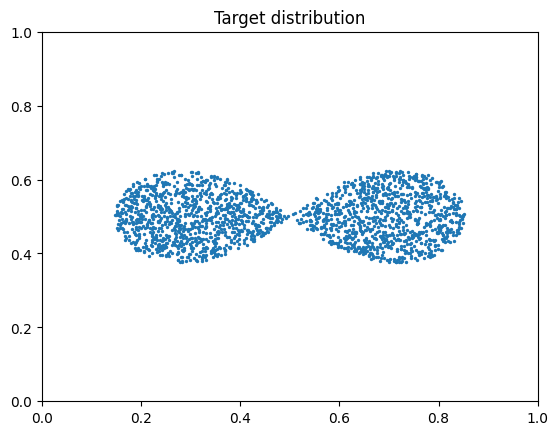

In [16]:
x = generate_points_distribution(2000, 'lemniscate')
plt.scatter(x[:,0], x[:,1], s=2.0)
plt.title('Target distribution')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.show()